# Assignment 3 - Opsis

In [1]:
import numpy as np
import ps_utils
import numpy.linalg as la
import matplotlib.pyplot as plt

### Exercise 2: Beethoven Dataset

If $nz$ is the number of pixels inside the non-zero part of the mask, You should create an array $J$ of size/shape $(3, nz)$ and obtain the albedo modulated normal field as $M = S^{−1}J$. With it, extract the albedo within the mask, display it as a 2D image. Then extract the normal field by normalizing $M$, extract its components $n1, n2, n3$. Solve for depth and display it at different view points.

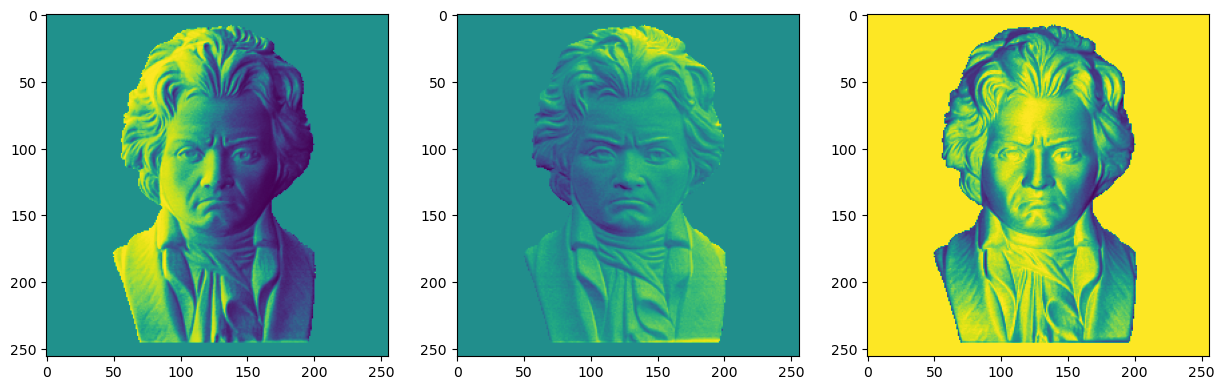

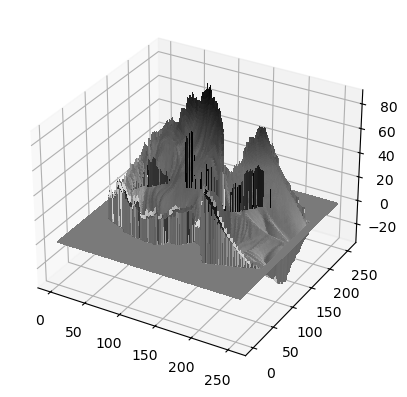

In [2]:
# Read Beethoven data
I, mask, S = ps_utils.read_data_file('Beethoven')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)

ps_utils.display_surface(z)

### Exercise 3: mat_vase 

If $nz$ is the number of pixels inside the non-zero part of the mask, You should create an array $J$ of size/shape $(3, nz)$ and obtain the albedo modulated normal field as $M = S^{−1}J$. With it, extract the albedo within the mask, display it as a 2D image. Then extract the normal field by normalizing $M$, extract its components $n1, n2, n3$. Solve for depth and display it at different view points.

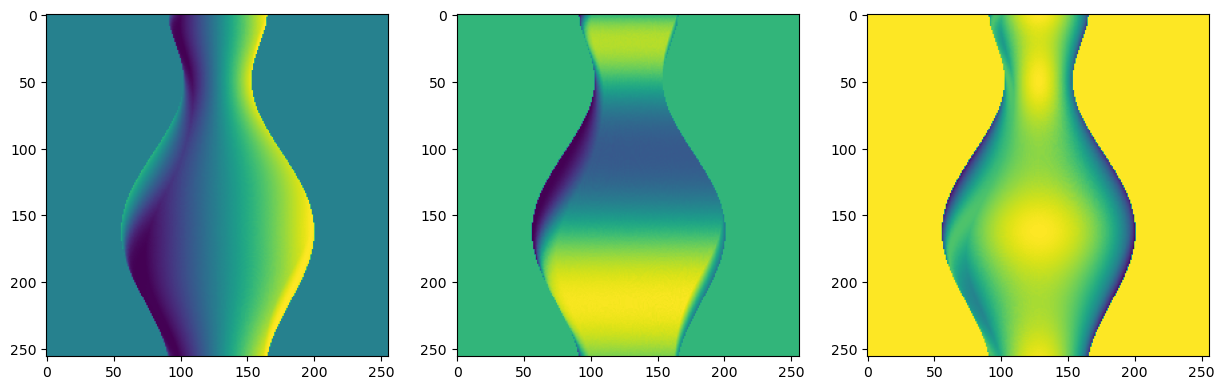

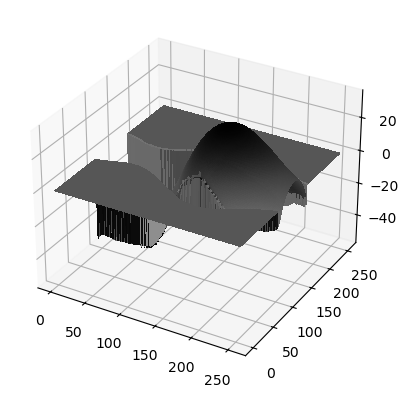

In [3]:
# Read matte vase data
I, mask, S = ps_utils.read_data_file('mat_vase')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)

ps_utils.display_surface(z)

### Exercise 4: shiny_vase Dataset

If $nz$ is the number of pixels inside the non-zero part of the mask, You should create an array $J$ of size/shape $(3, nz)$ and obtain the albedo modulated normal field as $M = S^{−1}J$. With it, extract the albedo within the mask, display it as a 2D image. Then extract the normal field by normalizing $M$, extract its components $n1, n2, n3$. Solve for depth and display it at different view points. Comment on what happens here.


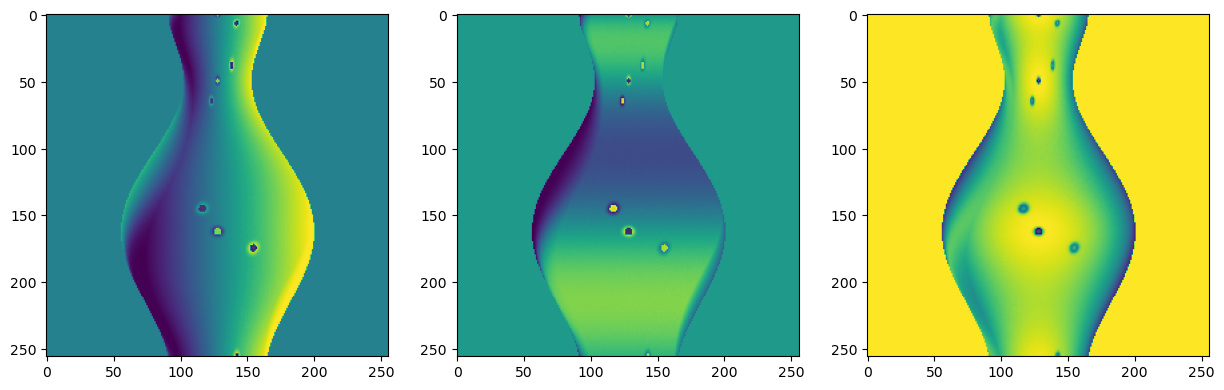

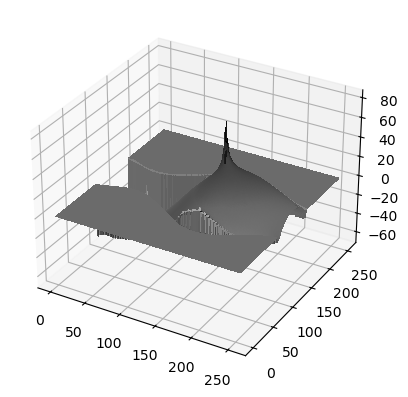

In [4]:
# Read shiny vase data
I, mask, S = ps_utils.read_data_file('shiny_vase')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)

ps_utils.display_surface(z)

Do you think that RANSAC could provide a better estimation of normals?  Explain. You should try and replace Woodham’s first step (via inverse pseudoinverse) with RANSAC estimation. The threshold parameter in `ransac_3dvector()`should no more than be 2.0. After the estimation for each pixel, extract the normals and the albedo. Display and comment on the results. Do they differ from Woodham’s estimation?

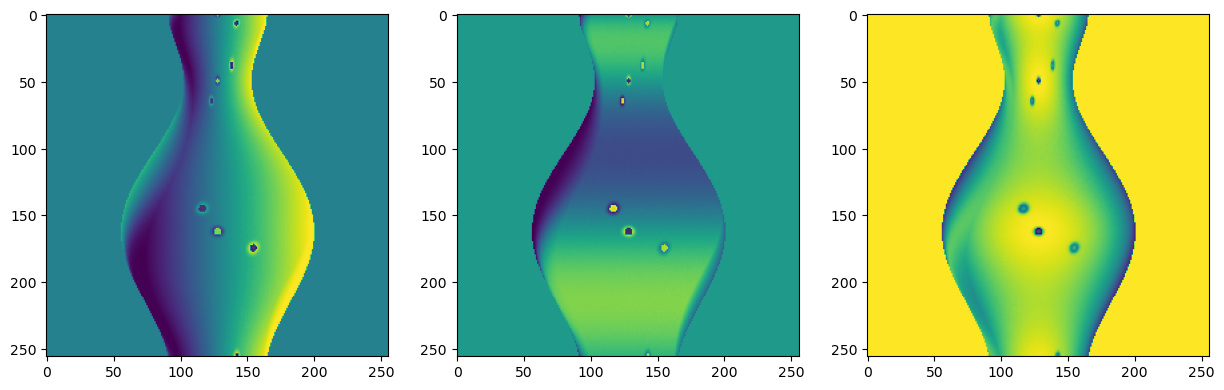

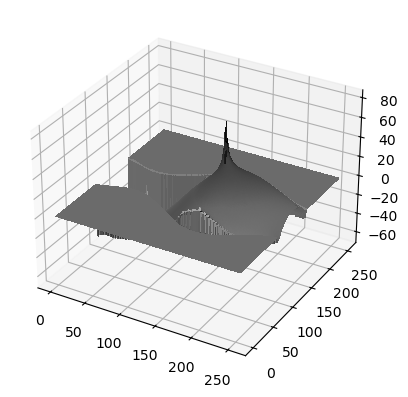

In [5]:
# Read shiny vase data
I, mask, S = ps_utils.read_data_file('shiny_vase')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Create an empty matrix to store the values
M = np.zeros((3, len(nz[0])))

# Iterate over non-zero pixels
for i in range(len(nz[0])):

    # Perform RANSAC
    result = ps_utils.ransac_3dvector((J[:, i], S), threshold=2.0, verbose=0)

    # Extract values and add to the matrix
    m_estimate, _, _ = result
    M[:, i] = m_estimate

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M / np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)
ps_utils.display_surface(z)

Try then to make the estimated normal field smoother using the `smooth_normal_field()` function. You may experiment with the `iters` parameter.

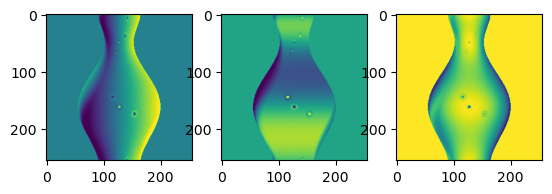

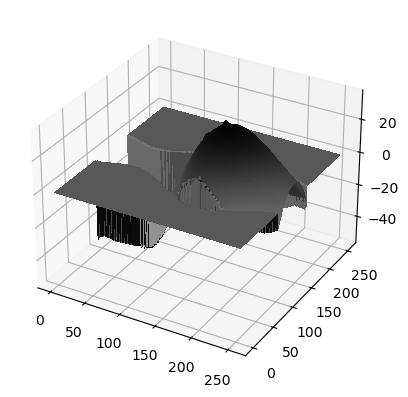

In [6]:
n1_smooth, n2_smooth, n3_smooth = ps_utils.smooth_normal_field(n1, n2, n3, mask, iters=13)

_, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(n1_smooth)
ax2.imshow(n2_smooth)
ax3.imshow(n3_smooth)
plt.show()

z_smooth = ps_utils.unbiased_integrate(n1_smooth, n2_smooth, n3_smooth, mask)
z_smooth = np.nan_to_num(z_smooth)
ps_utils.display_surface(z_smooth)

### Exercise 5: shiny_vase2 Dataset

If $nz$ is the number of pixels inside the non-zero part of the mask, You should create an array $J$ of size/shape $(22, nz)$ and obtain the albedo modulated normal field as $M = S†J$. With it, extract the albedo within the mask, display it as a 2D image. Then extract the normal field by normalizing $M$, extract its components $n1, n2, n3$. Solve for depth and display it at different view points. Comment on what happens here.

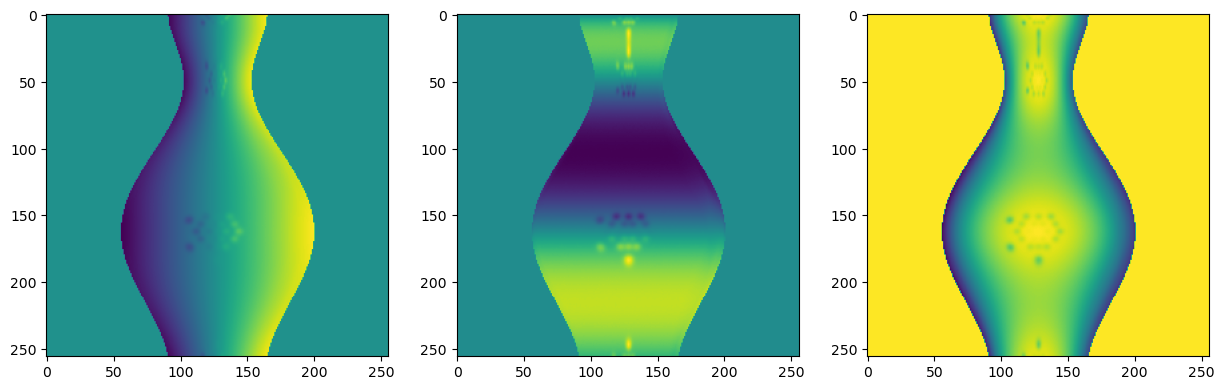

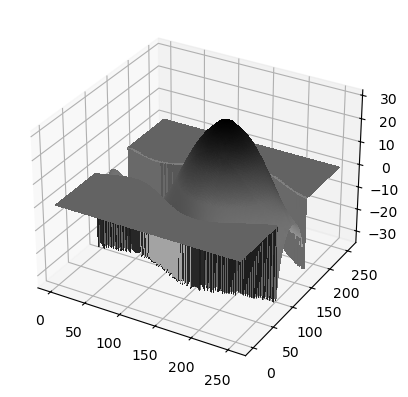

In [7]:
# Read shiny vase 2 data
I, mask, S = ps_utils.read_data_file('shiny_vase2')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((22, len(nz[0])))
for i in range(22):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Solve for M = rho*N
piS = la.pinv(S)
M = np.dot(piS, J)

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)

ps_utils.display_surface(z)

Do you think that RANSAC could provide a better estimation of normals? Explain. You should try and replace Woodham’s first step (via inverse pseudoinverse) with RANSAC estimation. The threshold parameter in `ransac_3dvector()` should no more than be 2.0. After the estimation for each pixel, extract the normals and the albedo. Display and comment on the results. Do they differ from Woodham’s estimation?

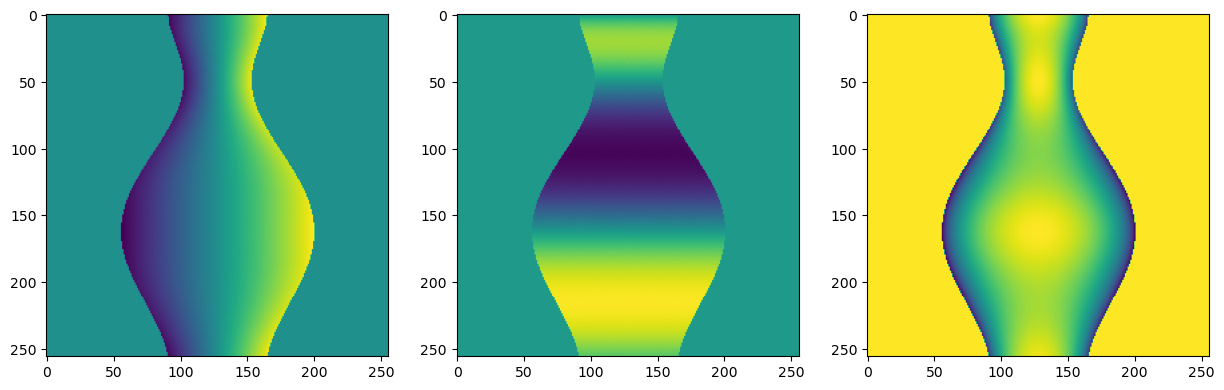

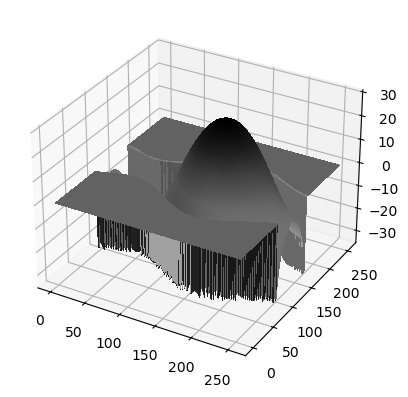

In [8]:
# Read shiny vase 2 data
I, mask, S = ps_utils.read_data_file('shiny_vase2')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((22, len(nz[0])))
for i in range(22):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Create an empty matrix to store the values
M = np.zeros((3, len(nz[0])))

# Iterate over non-zero pixels
for i in range(len(nz[0])):

    # Perform RANSAC
    result = ps_utils.ransac_3dvector((J[:, i], S), threshold=2.0, verbose=0)

    # Extract values and add to the matrix
    m_estimate, _, _ = result
    M[:, i] = m_estimate

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M / np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)
ps_utils.display_surface(z)

Try then to make the estimated normal field smoother using the `smooth_normal_field()` function. You may experiment with the `iters` parameter.

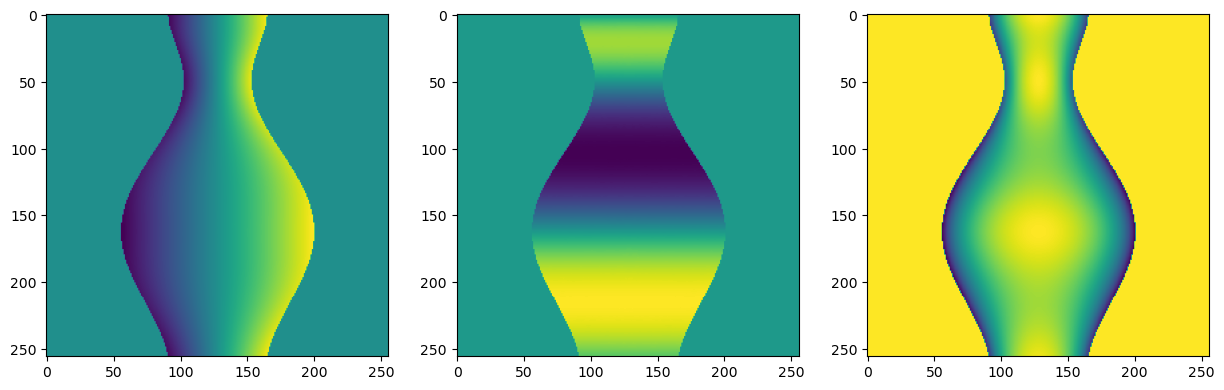

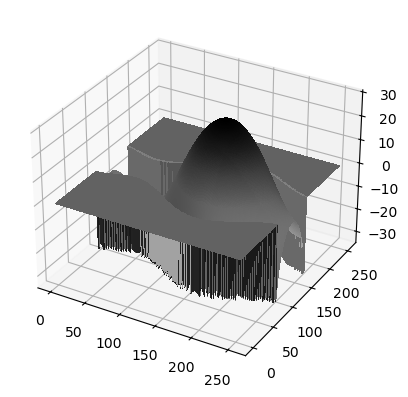

In [9]:
n1_smooth, n2_smooth, n3_smooth = ps_utils.smooth_normal_field(n1, n2, n3, mask, iters=13)

_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1_smooth)
ax2.imshow(n2_smooth)
ax3.imshow(n3_smooth)
plt.show()

z_smooth = ps_utils.unbiased_integrate(n1_smooth, n2_smooth, n3_smooth, mask)
z_smooth = np.nan_to_num(z_smooth)
ps_utils.display_surface(z_smooth)

### Exercise 6: Buddha Dataset

If $nz$ is the number of pixels inside the non-zero part of the mask, You should create an array $J$ of size/shape $(10, nz)$ and obtain the albedo modulated normal field as $M = S†J$ (the pseudo-inverse). With it, extract the albedo within the mask, display it as a 2D image. Then extract the normal field by normalizing $M$, extract its components $n1, n2, n3$. Solve for depth and display it at different view points.

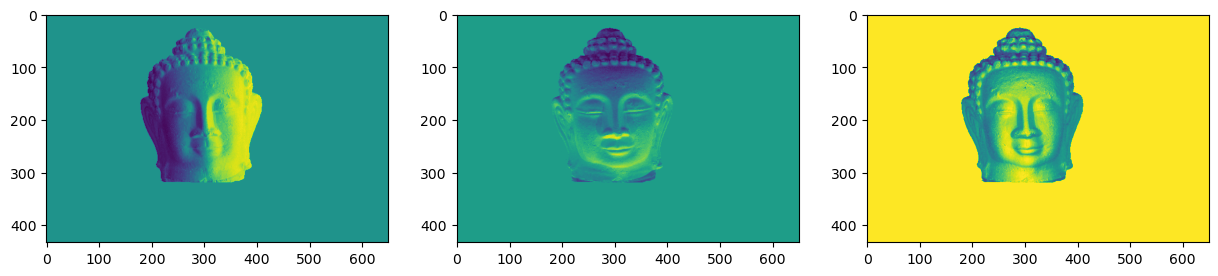

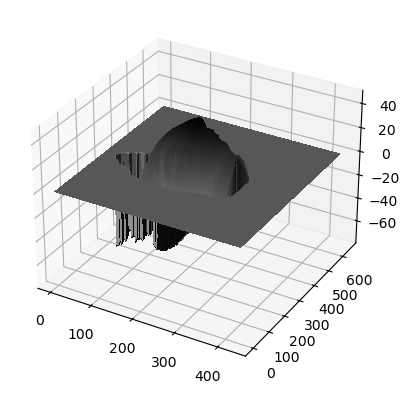

In [10]:
# Read Buddha data
I, mask, S = ps_utils.read_data_file('Buddha')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((10, len(nz[0])))
for i in range(10):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Solve for M = rho*N
piS = la.pinv(S)
M = np.dot(piS, J)

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)

ps_utils.display_surface(z)

You should try and replace Woodham’s first step (via inverse/pseudoinverse) with an estimation using RANSAC. The threshold parameter in `ransac_3dvector()` should be at least 25.0 Experiment with it. After the estimation for each pixel, extract the normals and the albedo. Display and comment on the results.

C:\Users\daria\AppData\Local\Temp\ipykernel_18860\3561839377.py:29: RuntimeWarning: invalid value encountered in divide
  N = M / np.tile(Rho, (3,1))


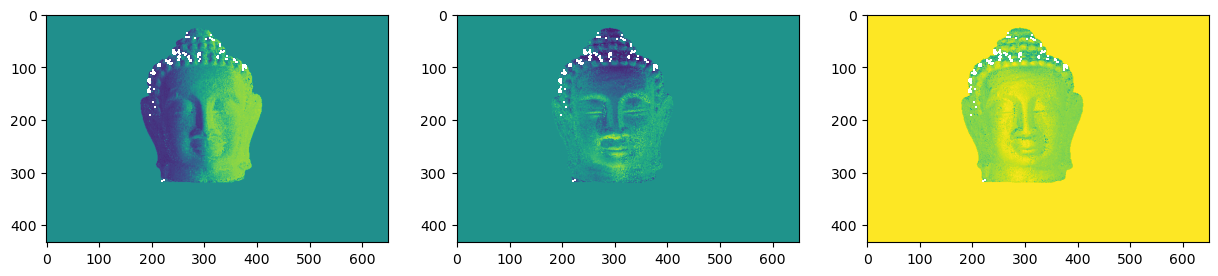

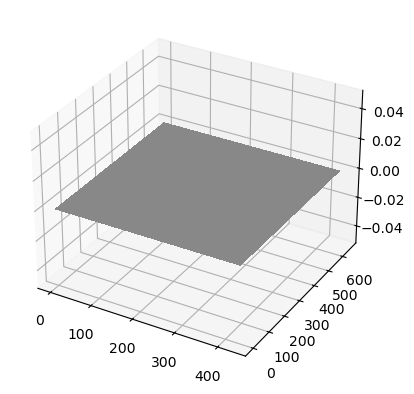

In [11]:
# Read Buddha data
I, mask, S = ps_utils.read_data_file('Buddha')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((10, len(nz[0])))
for i in range(10):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Create an empty matrix to store the values
M = np.zeros((3, len(nz[0])))

# Iterate over non-zero pixels
for i in range(len(nz[0])):

    # Perform RANSAC
    result = ps_utils.ransac_3dvector((J[:, i], S), threshold=25.0, verbose=0)

    # Extract values and add to the matrix
    m_estimate, _, _ = result
    M[:, i] = m_estimate

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M / np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)
ps_utils.display_surface(z)

Try then to make the estimated normal field smoother using the `smooth_normal_field()` function. You may experiment with the `iters` parameter.

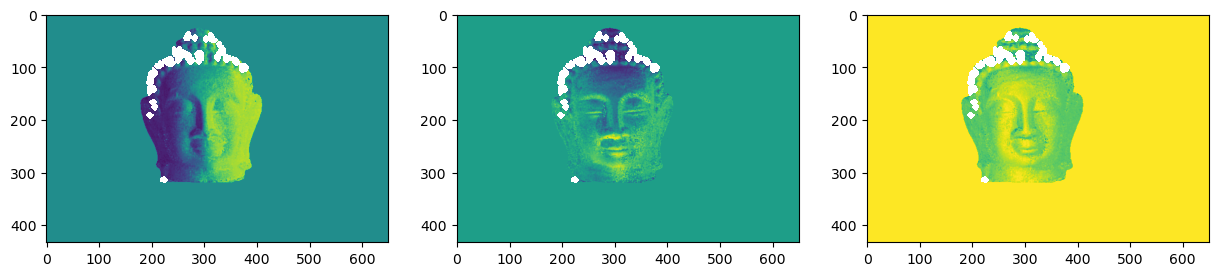

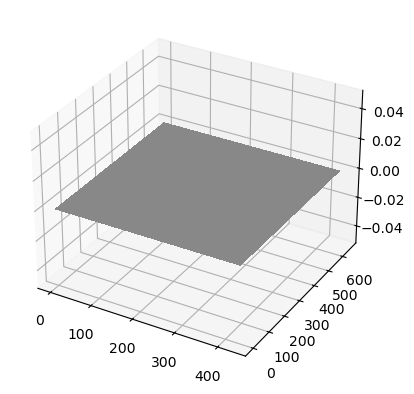

In [12]:
n1_smooth, n2_smooth, n3_smooth = ps_utils.smooth_normal_field(n1, n2, n3, mask, iters=5)

_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1_smooth)
ax2.imshow(n2_smooth)
ax3.imshow(n3_smooth)
plt.show()

z_smooth = ps_utils.unbiased_integrate(n1_smooth, n2_smooth, n3_smooth, mask)
z_smooth = np.nan_to_num(z_smooth)
ps_utils.display_surface(z_smooth)

### Exercise 7: face Dataset

If $nz$ is the number of pixels inside the non-zero part of the mask, You should create an array $J$ of size/shape $(27, nz)$ and obtain the albedo modulated normal field via RANSAC with a threshold of 10.0.

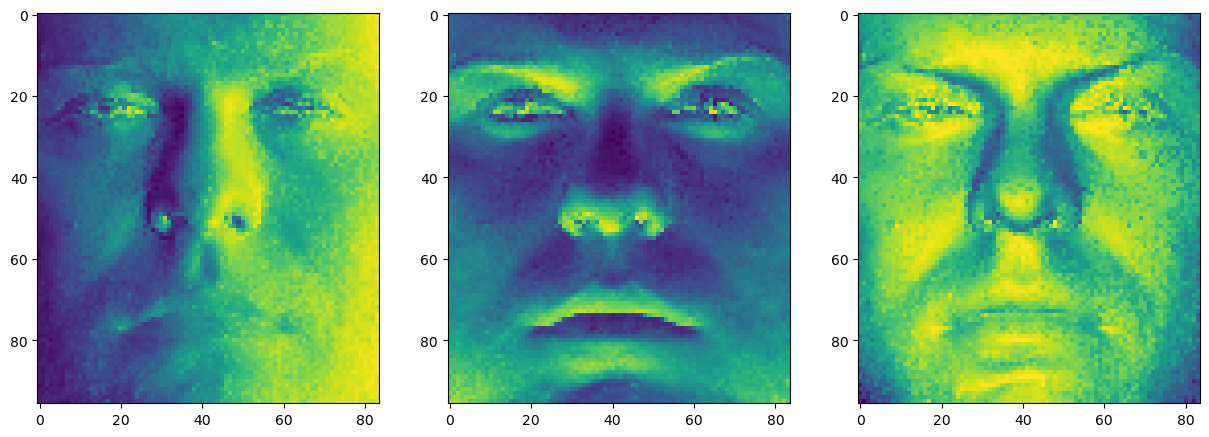

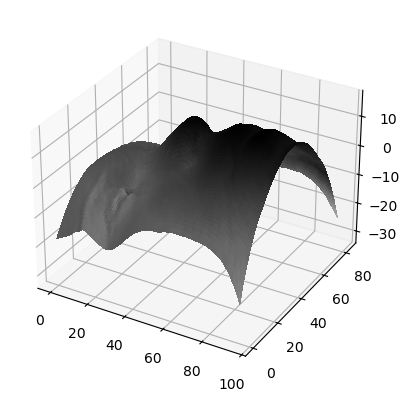

In [13]:
# Read face data
I, mask, S = ps_utils.read_data_file('face')

# Get indices of non-zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# For each mask pixel, collect image data
J = np.zeros((27, len(nz[0])))
for i in range(27):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

# Create an empty matrix to store the values
M = np.zeros((3, len(nz[0])))

# Iterate over non-zero pixels
for i in range(len(nz[0])):

    # Perform RANSAC
    result = ps_utils.ransac_3dvector((J[:, i], S), threshold=10.0, verbose=0)

    # Extract values and add to the matrix
    m_estimate, _, _ = result
    M[:, i] = m_estimate

# Get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M / np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
z = np.nan_to_num(z)
ps_utils.display_surface(z)

Try then to make the estimated normal field smoother using the `smooth_normal_field()` function. You may experiment with the `iters` parameter. Report your results.

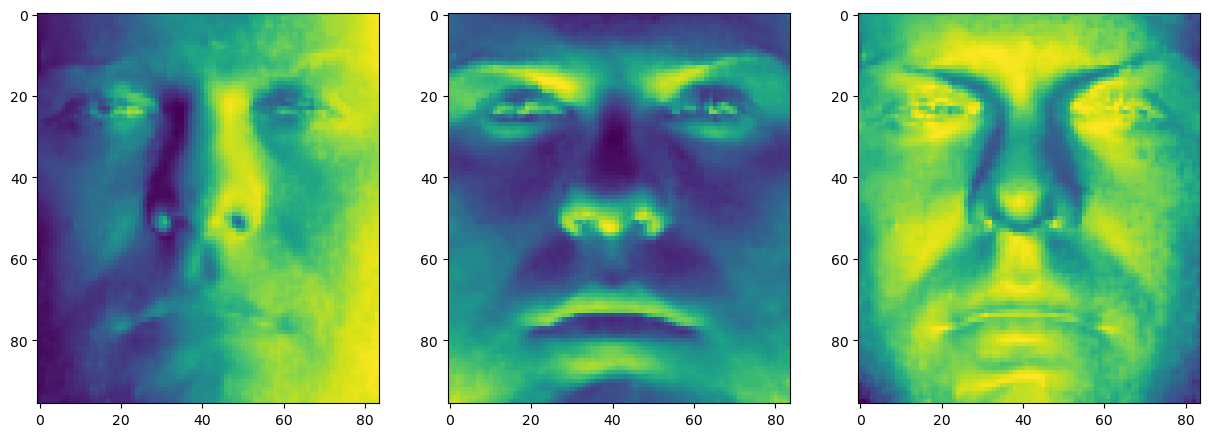

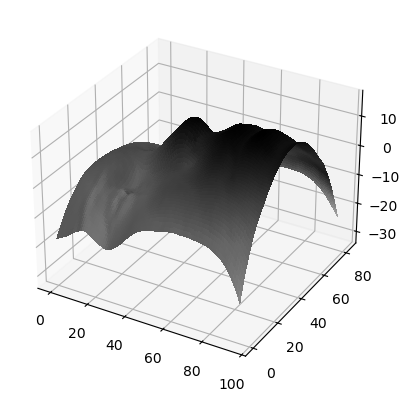

In [14]:
n1_smooth, n2_smooth, n3_smooth = ps_utils.smooth_normal_field(n1, n2, n3, mask, iters=5)

_, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,10))
ax1.imshow(n1_smooth)
ax2.imshow(n2_smooth)
ax3.imshow(n3_smooth)
plt.show()

z_smooth = ps_utils.unbiased_integrate(n1_smooth, n2_smooth, n3_smooth, mask)
z_smooth = np.nan_to_num(z_smooth)
ps_utils.display_surface(z_smooth)